In [63]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [46]:
TCOMM = pd.read_csv('telecom_churn.csv')


C:\Users\UNTITLED\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [45]:
TCOMM.shape

(13196, 108)

In [47]:
TCOMM.describe()

,EDUCATION_CD,SUBS_TENURE,OB_CALL_INTL_DUR_BASE_1,OB_CALL_INTL_DUR_BASE_2,OB_CALL_INTL_DUR_BASE_3,OB_CALL_INTL_DUR_BASE_4,OB_CALL_INTL_DUR_BASE_5,OB_CALL_INTL_DUR_BASE_6,OB_CALL_NAT_ROAM_CNT_BASE_1,OB_CALL_NAT_ROAM_CNT_BASE_2,...,PCT_CHNG_OB_WAP_CNT,PROPN_IB_LOW_DUR,RATIO_SPEC_SMS_SMS_REV_AMT,PCT_CHNG_SUSPENDED_CNT,PCT_CHNG_BILL_AMT,CUST_SUBS_ID,TOT_REV_AMT,TOT_PROF_AMT,CUST_ID,CHURN_FLG
count,10295.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,...,13196.000000,13196.000000,1.319600e+04,13196.000000,13196.000000,13196.000000,4170.000000,4170.000000,13196.000000,13196.000000
mean,1.638757,119.854956,14.765944,14.866619,15.507752,15.486564,15.515080,15.492331,7.382972,7.433309,...,0.962725,0.958707,1.107613e+05,181.500177,1.134070,6598.500000,22.214628,22.214628,3899.567824,0.082677
std,0.771904,27.139618,3.688206,3.531747,2.595205,2.587189,2.609266,2.608298,1.844103,1.765874,...,0.220144,0.686199,6.870144e+05,1042.495817,0.432525,3809.501411,29.721773,29.721773,2236.650159,0.275403
min,1.000000,24.000000,2.000000,3.000000,11.000000,11.000000,11.000000,11.000000,1.000000,1.500000,...,0.150782,0.000000,0.000000e+00,0.000000,0.245428,1.000000,-3.000000,-3.000000,1.000000,0.000000
25%,1.000000,102.000000,12.700000,12.800000,13.300000,13.300000,13.300000,13.200000,6.350000,6.400000,...,0.873424,0.550543,0.000000e+00,0.000000,0.823936,3299.750000,4.000000,4.000000,1971.750000,0.000000
50%,2.000000,120.000000,15.100000,15.200000,15.500000,15.500000,15.500000,15.400000,7.550000,7.600000,...,0.984957,0.823529,0.000000e+00,0.000000,1.087538,6598.500000,10.000000,10.000000,3898.500000,0.000000
75%,2.000000,138.000000,17.500000,17.600000,17.700000,17.700000,17.800000,17.800000,8.750000,8.800000,...,1.095395,1.200000,0.000000e+00,0.000000,1.373761,9897.250000,17.000000,17.000000,5833.250000,0.000000
max,7.000000,240.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,10.000000,10.000000,...,1.706667,26.000000,6.905000e+06,10000.000000,5.069565,13196.000000,100.000000,100.000000,7800.000000,1.000000


In [13]:
TCOMM.describe

<bound method NDFrame.describe of       GENDER_CD  EDUCATION_CD OCCUPATION_CAT_CD  SUBS_TENURE  \
0             M           2.0               NaN          198   
1             M           1.0               NaN          114   
2             M           2.0                24          114   
3             M           1.0                87          228   
4             F           4.0                22          168   
...         ...           ...               ...          ...   
13191         F           3.0                79          114   
13192         M           NaN               NaN          120   
13193         M           1.0               NaN          132   
13194         F           3.0               NaN          156   
13195         M           1.0               NaN          132   

       OB_CALL_INTL_DUR_BASE_1  OB_CALL_INTL_DUR_BASE_2  \
0                         16.8                     16.3   
1                          2.9                      4.6   
2                   

In [48]:
TCOMM.isnull().any()

GENDER_CD                   True
EDUCATION_CD                True
OCCUPATION_CAT_CD           True
SUBS_TENURE                False
OB_CALL_INTL_DUR_BASE_1    False
                           ...  
TOT_REV_AMT                 True
TOT_PROF_AMT                True
CUST_ID                    False
name                       False
CHURN_FLG                  False
Length: 108, dtype: bool

In [49]:
TCOMM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13196 entries, 0 to 13195
Columns: 108 entries, GENDER_CD to CHURN_FLG
dtypes: float64(45), int64(60), object(3)
memory usage: 10.9+ MB


In [50]:
T1 = TCOMM.drop(["GENDER_CD","name","CUST_ID","EDUCATION_CD","OCCUPATION_CAT_CD"],axis = 1)
T1


,SUBS_TENURE,OB_CALL_INTL_DUR_BASE_1,OB_CALL_INTL_DUR_BASE_2,OB_CALL_INTL_DUR_BASE_3,OB_CALL_INTL_DUR_BASE_4,OB_CALL_INTL_DUR_BASE_5,OB_CALL_INTL_DUR_BASE_6,OB_CALL_NAT_ROAM_CNT_BASE_1,OB_CALL_NAT_ROAM_CNT_BASE_2,OB_CALL_NAT_ROAM_CNT_BASE_3,...,PCT_CHNG_OB_LOC_SMS_CNT,PCT_CHNG_OB_WAP_CNT,PROPN_IB_LOW_DUR,RATIO_SPEC_SMS_SMS_REV_AMT,PCT_CHNG_SUSPENDED_CNT,PCT_CHNG_BILL_AMT,CUST_SUBS_ID,TOT_REV_AMT,TOT_PROF_AMT,CHURN_FLG
0,198,16.8,16.3,15.2,18.0,15.4,13.9,8.40,8.15,7.60,...,1.059200,1.059200,0.739130,0.000000,0.0,0.955526,1,NaN,NaN,0
1,114,2.9,4.6,19.0,16.1,11.6,13.6,1.45,2.30,9.50,...,0.248756,0.248756,1.576923,1.563786,0.0,0.938199,2,99.0,99.0,1
2,114,2.5,4.7,18.5,18.8,19.4,16.8,1.25,2.35,9.25,...,0.195918,0.195918,1.538462,4.108014,5000.0,0.720440,3,47.0,47.0,1
3,228,16.0,15.8,15.5,17.4,11.7,11.0,8.00,7.90,7.75,...,1.143885,1.143885,1.655172,0.000000,0.0,0.880032,4,NaN,NaN,0
4,168,14.6,14.1,16.3,13.5,13.4,14.6,7.30,7.05,8.15,...,0.993080,0.993080,1.733333,0.000000,0.0,1.282770,5,97.0,97.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13191,114,15.1,15.9,16.8,13.7,16.3,19.0,7.55,7.95,8.40,...,0.942249,0.942249,0.615385,0.000000,0.0,0.932459,13192,NaN,NaN,0
13192,120,19.9,14.4,17.0,16.9,14.7,11.8,9.95,7.20,8.50,...,1.135762,1.135762,1.162791,0.000000,0.0,0.849638,13193,NaN,NaN,0
13193,132,17.7,12.5,14.9,17.8,19.6,13.4,8.85,6.25,7.45,...,0.919330,0.919330,0.216216,0.000000,0.0,0.767135,13194,7.0,7.0,0
13194,156,11.1,19.3,11.8,15.7,11.0,16.7,5.55,9.65,5.90,...,1.101449,1.101449,0.557377,0.000000,0.0,0.631247,13195,5.0,5.0,0


In [51]:
print(T1.isnull().any())
T1.isnull().sum()

SUBS_TENURE                False
OB_CALL_INTL_DUR_BASE_1    False
OB_CALL_INTL_DUR_BASE_2    False
OB_CALL_INTL_DUR_BASE_3    False
OB_CALL_INTL_DUR_BASE_4    False
                           ...  
PCT_CHNG_BILL_AMT          False
CUST_SUBS_ID               False
TOT_REV_AMT                 True
TOT_PROF_AMT                True
CHURN_FLG                  False
Length: 103, dtype: bool


SUBS_TENURE                   0
OB_CALL_INTL_DUR_BASE_1       0
OB_CALL_INTL_DUR_BASE_2       0
OB_CALL_INTL_DUR_BASE_3       0
OB_CALL_INTL_DUR_BASE_4       0
                           ... 
PCT_CHNG_BILL_AMT             0
CUST_SUBS_ID                  0
TOT_REV_AMT                9026
TOT_PROF_AMT               9026
CHURN_FLG                     0
Length: 103, dtype: int64

In [52]:
col_miss = TCOMM[["TOT_REV_AMT","TOT_PROF_AMT"]]
col_miss

,TOT_REV_AMT,TOT_PROF_AMT
0,NaN,NaN
1,99.0,99.0
2,47.0,47.0
3,NaN,NaN
4,97.0,97.0
...,...,...
13191,NaN,NaN
13192,NaN,NaN
13193,7.0,7.0
13194,5.0,5.0


In [53]:
col_avg = round(col_miss.mean())
col_avg

TOT_REV_AMT     22.0
TOT_PROF_AMT    22.0
dtype: float64

In [54]:
col_fill = col_miss.fillna(round(col_miss.mean()))
col_fill

,TOT_REV_AMT,TOT_PROF_AMT
0,22.0,22.0
1,99.0,99.0
2,47.0,47.0
3,22.0,22.0
4,97.0,97.0
...,...,...
13191,22.0,22.0
13192,22.0,22.0
13193,7.0,7.0
13194,5.0,5.0


In [55]:
T1[["TOT_REV_AMT","TOT_PROF_AMT"]] = col_fill

In [57]:
T1

,SUBS_TENURE,OB_CALL_INTL_DUR_BASE_1,OB_CALL_INTL_DUR_BASE_2,OB_CALL_INTL_DUR_BASE_3,OB_CALL_INTL_DUR_BASE_4,OB_CALL_INTL_DUR_BASE_5,OB_CALL_INTL_DUR_BASE_6,OB_CALL_NAT_ROAM_CNT_BASE_1,OB_CALL_NAT_ROAM_CNT_BASE_2,OB_CALL_NAT_ROAM_CNT_BASE_3,...,PCT_CHNG_OB_LOC_SMS_CNT,PCT_CHNG_OB_WAP_CNT,PROPN_IB_LOW_DUR,RATIO_SPEC_SMS_SMS_REV_AMT,PCT_CHNG_SUSPENDED_CNT,PCT_CHNG_BILL_AMT,CUST_SUBS_ID,TOT_REV_AMT,TOT_PROF_AMT,CHURN_FLG
0,198,16.8,16.3,15.2,18.0,15.4,13.9,8.40,8.15,7.60,...,1.059200,1.059200,0.739130,0.000000,0.0,0.955526,1,22.0,22.0,0
1,114,2.9,4.6,19.0,16.1,11.6,13.6,1.45,2.30,9.50,...,0.248756,0.248756,1.576923,1.563786,0.0,0.938199,2,99.0,99.0,1
2,114,2.5,4.7,18.5,18.8,19.4,16.8,1.25,2.35,9.25,...,0.195918,0.195918,1.538462,4.108014,5000.0,0.720440,3,47.0,47.0,1
3,228,16.0,15.8,15.5,17.4,11.7,11.0,8.00,7.90,7.75,...,1.143885,1.143885,1.655172,0.000000,0.0,0.880032,4,22.0,22.0,0
4,168,14.6,14.1,16.3,13.5,13.4,14.6,7.30,7.05,8.15,...,0.993080,0.993080,1.733333,0.000000,0.0,1.282770,5,97.0,97.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13191,114,15.1,15.9,16.8,13.7,16.3,19.0,7.55,7.95,8.40,...,0.942249,0.942249,0.615385,0.000000,0.0,0.932459,13192,22.0,22.0,0
13192,120,19.9,14.4,17.0,16.9,14.7,11.8,9.95,7.20,8.50,...,1.135762,1.135762,1.162791,0.000000,0.0,0.849638,13193,22.0,22.0,0
13193,132,17.7,12.5,14.9,17.8,19.6,13.4,8.85,6.25,7.45,...,0.919330,0.919330,0.216216,0.000000,0.0,0.767135,13194,7.0,7.0,0
13194,156,11.1,19.3,11.8,15.7,11.0,16.7,5.55,9.65,5.90,...,1.101449,1.101449,0.557377,0.000000,0.0,0.631247,13195,5.0,5.0,0


In [56]:
print(T1.isnull().any())

SUBS_TENURE                False
OB_CALL_INTL_DUR_BASE_1    False
OB_CALL_INTL_DUR_BASE_2    False
OB_CALL_INTL_DUR_BASE_3    False
OB_CALL_INTL_DUR_BASE_4    False
                           ...  
PCT_CHNG_BILL_AMT          False
CUST_SUBS_ID               False
TOT_REV_AMT                False
TOT_PROF_AMT               False
CHURN_FLG                  False
Length: 103, dtype: bool


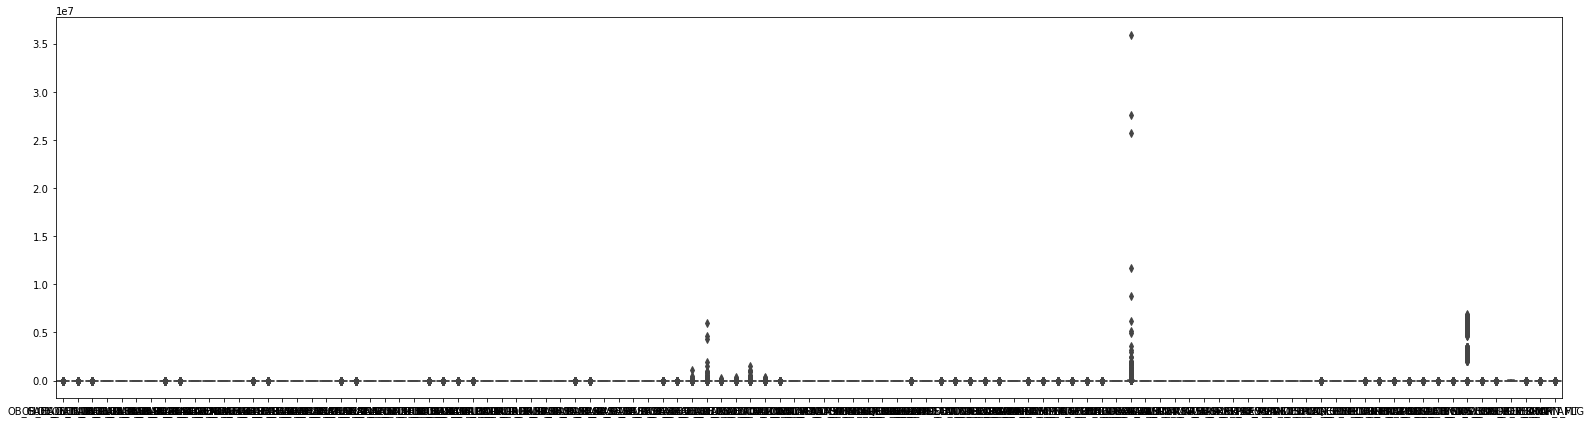

In [71]:
plt.figure(figsize = (27,7))
sns.boxplot(data = T1)
plt.show()

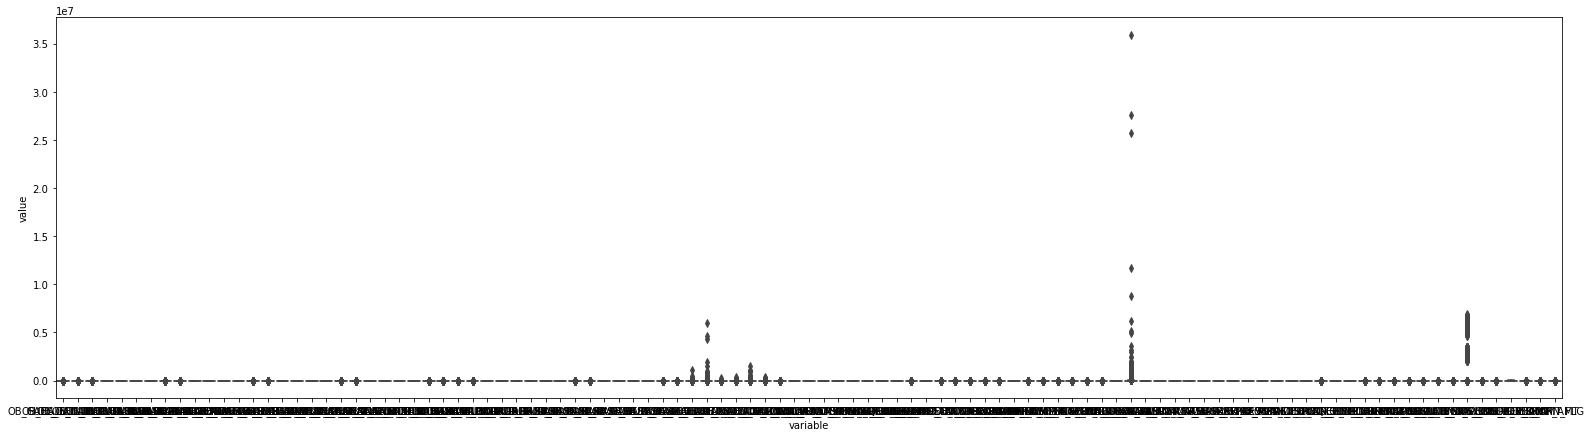

In [72]:
plt.figure(figsize=(27, 7))
sns.boxplot(x="variable", y="value", data=pd.melt(T1))
plt.show()

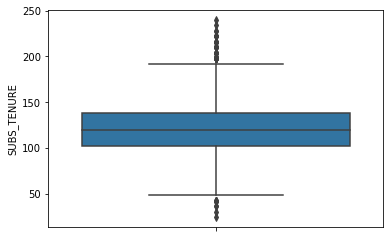

In [69]:
sns.boxplot(y=T1["SUBS_TENURE"])
plt.show()